Exercise: Binary and Multiclass Classification with Logistic Regression and SGDClassifier

This exercise focuses on binary and multiclass classification using two popular classifiers: `LogisticRegression` and `SGDClassifier`. The goal is to:

1. **Train binary classifiers** on a simple `make_moons` dataset.
2. **Track and evaluate performance** using metrics like accuracy, precision, recall, and F1-score.
3. **Visualize results** with confusion matrices.
4. **Extend the exercise to multiclass classification** using `make_classification`.
5. **Compare performance** between binary and multiclass classification.

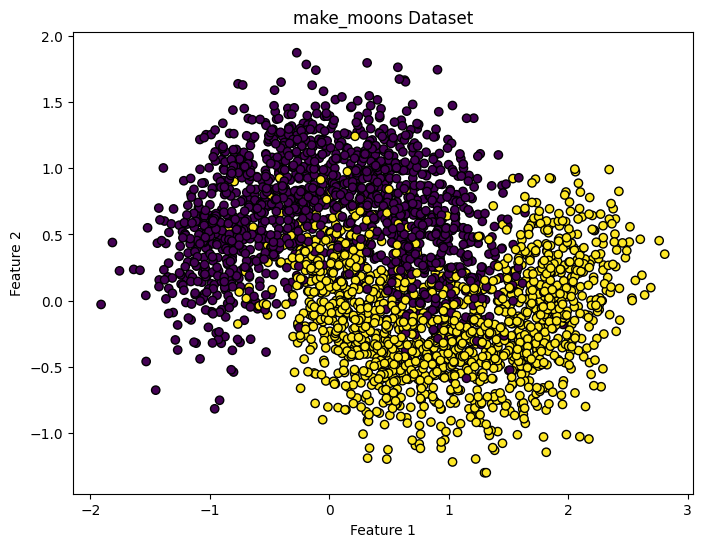

Binary - X_train shape: (2400, 2)
Binary - y_train shape: (2400,)
Binary - X_test shape: (600, 2)
Binary - y_test shape: (600,)
------------------------------


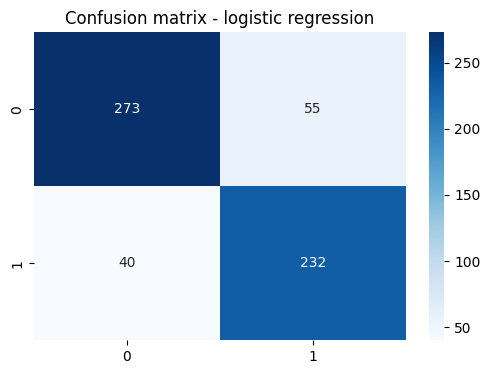

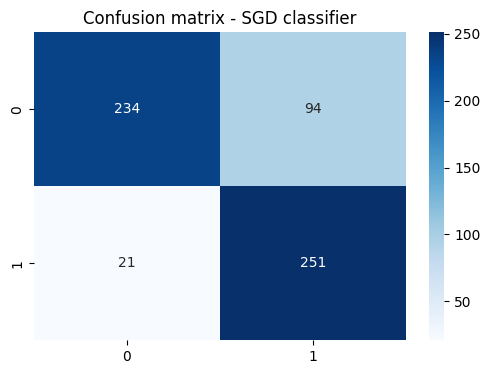

Binary classification results:
Results for Logistic regression:
Accuracy: 0.8417
Precision: 0.8084
Recall: 0.8529
F1-Score: 0.8301

Results for SGD classifier:
Accuracy: 0.8083
Precision: 0.7275
Recall: 0.9228
F1-Score: 0.8136



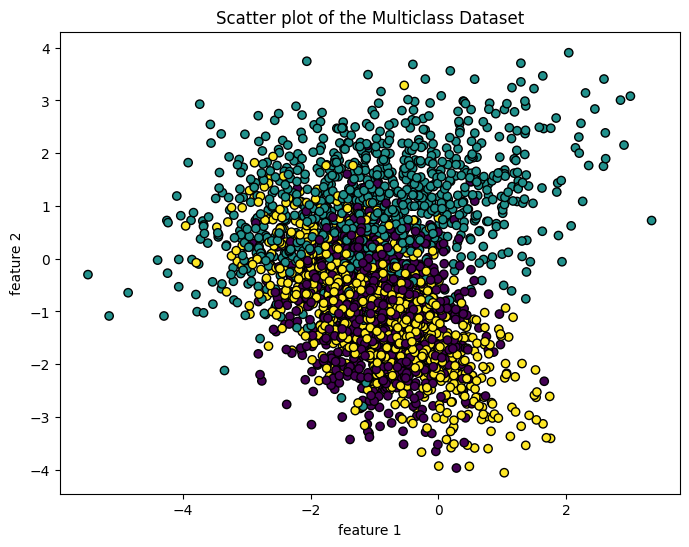

Multiclass - X_train shape: (2400, 3)
Multiclass - y_train shape: (2400,)
Multiclass - X_test shape: (600, 3)
Multiclass - y_test shape: (600,)
------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


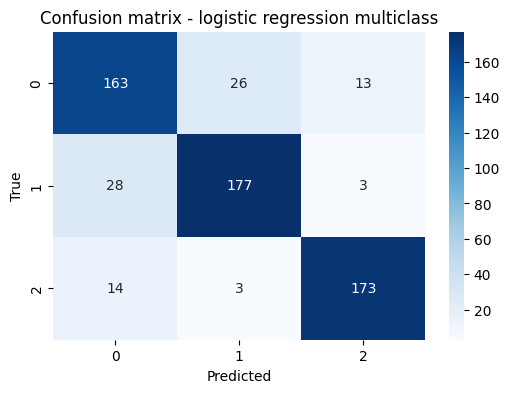

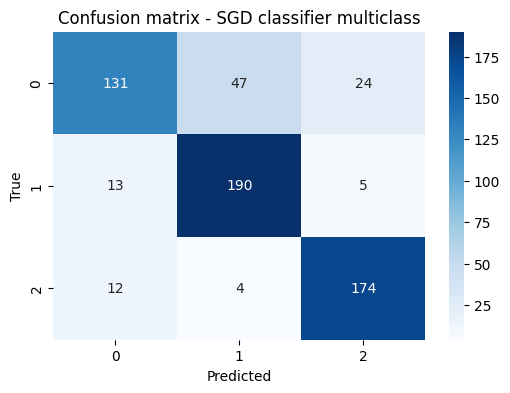

Multiclass classification results:
Results for Logistic regression (multiclass):
Accuracy: 0.8550
Precision: 0.8566
Recall: 0.8561
F1-Score: 0.8563

Results for SGD classifier (multiclass):
Accuracy: 0.8250
Precision: 0.8284
Recall: 0.8259
F1-Score: 0.8212



In [ ]:

from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


results = {}

def track_results(model_name, y_true, y_pred):
    """
    Track metrics for each model.
    """
    results[model_name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }
    return results[model_name]


X, y = make_moons(n_samples=3000, noise=0.3, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('make_moons Dataset')
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Binary - X_train shape: {X_train.shape}")
print(f"Binary - y_train shape: {y_train.shape}")
print(f"Binary - X_test shape: {X_test.shape}")
print(f"Binary - y_test shape: {y_test.shape}")
print("-" * 30)


log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
track_results("Logistic regression", y_test, y_pred_log_reg)

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log_reg, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix - logistic regression')
plt.show()

sgd_cls = SGDClassifier(random_state=42)
sgd_cls.fit(X_train, y_train)

y_pred_sgd_cls = sgd_cls.predict(X_test)
track_results("SGD classifier", y_test, y_pred_sgd_cls)

cm_sgd_cls = confusion_matrix(y_test, y_pred_sgd_cls)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sgd_cls, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix - SGD classifier')
plt.show()

print("Binary classification results:")
for model, metrics in results.items():
    print(f"Results for {model}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")
    print()

results_multiclass = {}

def track_results_multiclass(model_name, y_true, y_pred):
    results_multiclass[model_name] = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='macro'),
        "Recall": recall_score(y_true, y_pred, average='macro'),
        "F1-Score": f1_score(y_true, y_pred, average='macro')
    }
    return results_multiclass[model_name]

def plot_confusion_matrix(y_true, y_pred, title="Confusion matrix"):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

X, y = make_classification(
    n_samples=3000,
    n_features=3,
    n_classes=3,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_clusters_per_class=1,
    random_state=42
)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Scatter plot of the Multiclass Dataset")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Multiclass - X_train shape: {X_train.shape}")
print(f"Multiclass - y_train shape: {y_train.shape}")
print(f"Multiclass - X_test shape: {X_test.shape}")
print(f"Multiclass - y_test shape: {y_test.shape}")
print("-" * 30)

log_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg_multi.fit(X_train, y_train)
y_pred_log_reg = log_reg_multi.predict(X_test)
track_results_multiclass("Logistic regression (multiclass)", y_test, y_pred_log_reg)
plot_confusion_matrix(y_test, y_pred_log_reg, title="Confusion matrix - logistic regression multiclass")

sgd_cls_multi = SGDClassifier(random_state=42)
sgd_cls_multi.fit(X_train, y_train)
y_pred_sgd_cls = sgd_cls_multi.predict(X_test)
track_results_multiclass("SGD classifier (multiclass)", y_test, y_pred_sgd_cls)
plot_confusion_matrix(y_test, y_pred_sgd_cls, title="Confusion matrix - SGD classifier multiclass")


print("Multiclass classification results:")
for model, metrics in results_multiclass.items():
    print(f"Results for {model}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.4f}")
    print()